In [1]:
import import_ipynb # allows a notebook to be imported as if it were a .py file.
import numpy as np 
import pandas as pd
import math
import random
import seaborn as sns

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

from Clustering_Functions import *

importing Jupyter notebook from Clustering_Functions.ipynb


CLOSENESS AND REPEATABILITY

For each of the 17 elections, we form clusters using each of the clustering algorithms.  We create the table in the paper showing the average and maximum amount (over the 17 elections) by which each pair of methods differ.  Diagonal entries represent the difference between two runs of the same algorithm.

In [15]:
names = ['MeanB','MeanH', 'MedoB', 'MedoH', 'Slate', 'RND']
n = len(names)
M = np.zeros([17,n,n])
for ward in range(1, 18):
    election, cand_names, location = parse(f"Data/edinburgh17-{ward:02}.blt")
    num_cands = max([item for ranking in election.keys() for item in ranking])
    print(f"\n\nElection {ward} with {num_cands} candidates:\n")
    
    MeanB = kmeans(election, proxy = 'Borda', n_init=200)
    MeanB_2 = kmeans(election, proxy = 'Borda', n_init=200)
    MeanH = kmeans(election, proxy = 'HH', n_init=200)
    MeanH_2 = kmeans(election, proxy = 'HH', n_init=200)
    print("Medoids with Borda Proxies:")
    MedoB = kmedoids(election, proxy = 'Borda')
    MedoB_2 = kmedoids(election, proxy = 'Borda')
    print("\n Medoids with Head-to-head Proxies:")
    MedoH = kmedoids(election, proxy = 'HH')
    MedoH_2 = kmedoids(election, proxy = 'HH')
    print("\n")
    Slate = Slate_cluster(election)
    RND = Random_clusters(election)
    RND_2 = Random_clusters(election)

    
    ls = [MeanB, MeanH, MedoB, MedoH, Slate, RND]
    for x in range(n):
        for y in range(n):
            M[ward-1,x,y] = Clustering_closeness(election, ls[x],ls[y])
    M[ward-1,0,0] = Clustering_closeness(election, MeanB, MeanB_2)
    M[ward-1,1,1] = Clustering_closeness(election, MeanH, MeanH_2)
    M[ward-1,2,2] = Clustering_closeness(election, MedoB, MedoB_2)
    M[ward-1,3,3] = Clustering_closeness(election, MedoH, MedoH_2)
    M[ward-1,5,5] = Clustering_closeness(election, RND, RND_2)

    
M_avg = np.zeros([n,n])
M_max = np.zeros([n,n])
for x in range(n):
    for y in range(n):
        M_avg[x,y] = np.round(np.mean([M[t,x,y] for t in range(17)]),3)
        M_max[x,y] = np.round(max([M[t,x,y] for t in range(17)]),3)

df_avg = pd.DataFrame(M_avg, columns=names,index=names)
df_max = pd.DataFrame(M_max, columns=names,index=names)



Election 1 with 10 candidates:

Medoids with Borda Proxies:
Medoids = [(9, 7), (4, 10, 2)].
Portion of ballots that tied = 0.0
Medoids = [(4, 10, 2), (9, 7)].
Portion of ballots that tied = 0.0

 Medoids with Head-to-head Proxies:
Medoids = [(9, 7), (4, 10, 2)].
Portion of ballots that tied = 0.0
Medoids = [(4, 10, 2), (9, 7)].
Portion of ballots that tied = 0.0


Slate = (2, 4, 10).
Portion of ballots that tied = 0.0009150418807630042


Election 2 with 7 candidates:

Medoids with Borda Proxies:
Medoids = [(1, 6), (3, 5, 7, 4)].
Portion of ballots that tied = 0.0
Medoids = [(1, 6), (3, 5, 7, 4)].
Portion of ballots that tied = 0.0

 Medoids with Head-to-head Proxies:
Medoids = [(3, 5, 4), (1, 6)].
Portion of ballots that tied = 0.009721608484312859
Medoids = [(3, 5, 4), (1, 6)].
Portion of ballots that tied = 0.009721608484312859


Slate = (3, 5, 7).
Portion of ballots that tied = 0.03870967741935484


Election 3 with 5 candidates:

Medoids with Borda Proxies:
Medoids = [(2, 5, 1, 4)

In [16]:
df_avg

,MeanB,MeanH,MedoB,MedoH,Slate,RND
MeanB,0.000,0.014,0.052,0.039,0.077,0.431
MeanH,0.014,0.000,0.050,0.036,0.081,0.431
MedoB,0.052,0.050,0.000,0.032,0.076,0.429
MedoH,0.039,0.036,0.032,0.000,0.077,0.428
Slate,0.077,0.081,0.076,0.077,0.000,0.429
RND,0.431,0.431,0.429,0.428,0.429,0.459


In [17]:
df_max

,MeanB,MeanH,MedoB,MedoH,Slate,RND
MeanB,0.000,0.038,0.098,0.092,0.177,0.499
MeanH,0.038,0.000,0.099,0.077,0.167,0.494
MedoB,0.098,0.099,0.000,0.116,0.161,0.492
MedoH,0.092,0.077,0.116,0.000,0.136,0.483
Slate,0.177,0.167,0.161,0.136,0.000,0.490
RND,0.499,0.494,0.492,0.483,0.490,0.498


In [53]:
df_avg.to_csv('df_avg.csv')
df_max.to_csv('df_max.csv')

In [29]:
df_avg.to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & MeanB & MeanH & MedoB & MedoH & Slate & RND \\\\\n\\midrule\nMeanB & 0.000000 & 0.014000 & 0.052000 & 0.039000 & 0.077000 & 0.431000 \\\\\nMeanH & 0.014000 & 0.000000 & 0.050000 & 0.036000 & 0.081000 & 0.431000 \\\\\nMedoB & 0.052000 & 0.050000 & 0.000000 & 0.032000 & 0.076000 & 0.429000 \\\\\nMedoH & 0.039000 & 0.036000 & 0.032000 & 0.000000 & 0.077000 & 0.428000 \\\\\nSlate & 0.077000 & 0.081000 & 0.076000 & 0.077000 & 0.000000 & 0.429000 \\\\\nRND & 0.431000 & 0.431000 & 0.429000 & 0.428000 & 0.429000 & 0.459000 \\\\\n\\bottomrule\n\\end{tabular}\n'

Create the plots in Section 2 of the paper.

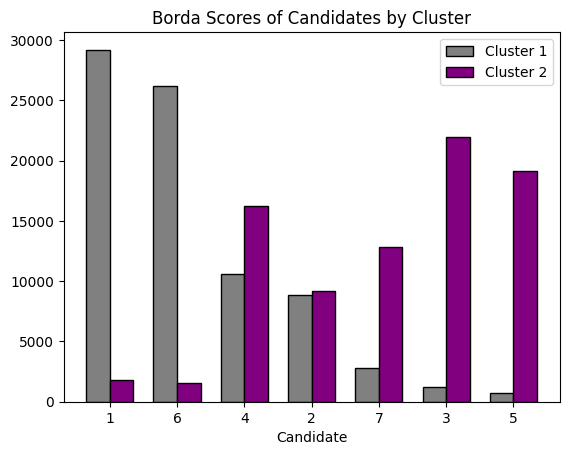

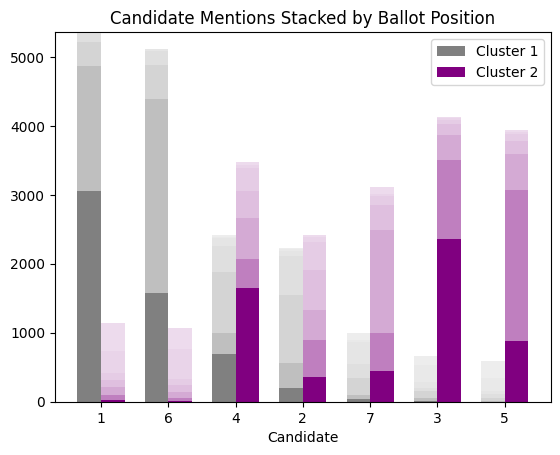

In [3]:
ward = 2
election, cand_names, location = parse(f"Data/edinburgh17-{ward:02}.blt")
C = kmeans(election, proxy='Borda')
Plot_clusters(C, method = 'Borda', filename='Ward2_Borda_plot.jpg')
Plot_clusters(C, method = 'Mentions', filename='Ward2_mentions_plot.jpg')

Slate = (3, 5, 7).
Portion of ballots that tied = 0.03870967741935484


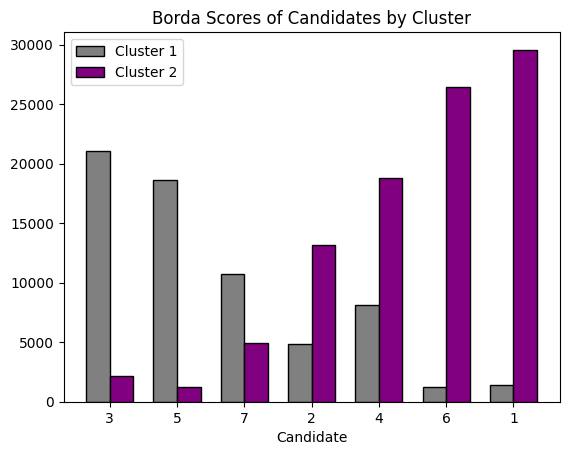

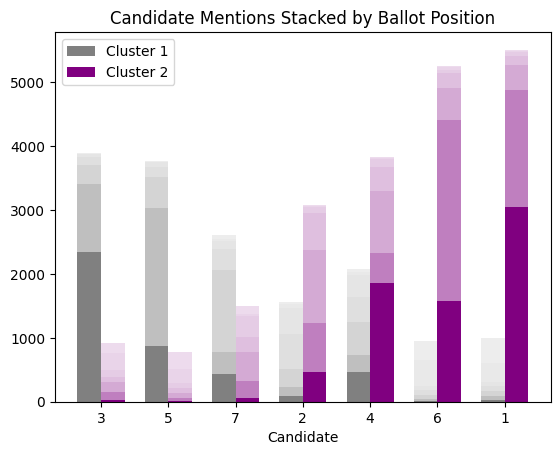

In [4]:
C2 = Slate_cluster(election)
order = [3,5,7,2,4,6,1]
Plot_clusters(C2, method = 'Borda', order = order, filename='slate_borda.jpg')
Plot_clusters(C2, method = 'Mentions', order = order, filename='slate_mentions.jpg')

Generate the 81% value reported in Section 2 of the paper.

In [10]:
L1 = [{2,3,4,5,7},{1,6}]
L2 = [{1,6},{2,3,4,5,7}]
S = Success_count(election,L1)+Success_count(election,L2)
S

0.8154661953159523

Generate the tables in the "Slate Identification" section of our paper

In [6]:
Find_slates(C)

0.16 of cluster 0 ballots:  {3} >= {5} >= {4} >= {7} >= {2} >= {1} >= {6}.
0.34 of cluster 1 ballots:  {1} >= {6} >= {4} >= {2} >= {7} >= {3} >= {5}.
---
0.17 of cluster 0 ballots:  {3} >= {4, 5} >= {7} >= {2} >= {1} >= {6}.
0.34 of cluster 1 ballots:  {1} >= {6} >= {2} >= {4, 5} >= {7} >= {3}.
---
0.18 of cluster 0 ballots:  {3} >= {4, 5} >= {7} >= {2} >= {1, 6}.
0.52 of cluster 1 ballots:  {1, 6} >= {2} >= {4, 5} >= {7} >= {3}.
---
0.37 of cluster 0 ballots:  {3, 4, 5} >= {7} >= {2} >= {1, 6}.
0.52 of cluster 1 ballots:  {1, 6} >= {2} >= {3, 4, 5} >= {7}.
---
0.6 of cluster 0 ballots:  {3, 4, 5, 7} >= {2} >= {1, 6}.
0.55 of cluster 1 ballots:  {1, 6} >= {2} >= {3, 4, 5, 7}.
---
0.89 of cluster 0 ballots:  {2, 3, 4, 5, 7} >= {1, 6}.
0.74 of cluster 1 ballots:  {1, 6} >= {2, 3, 4, 5, 7}.
---
1.0 of cluster 0 ballots:  {1, 2, 3, 4, 5, 6, 7}.
1.0 of cluster 1 ballots:  {1, 2, 3, 4, 5, 6, 7}.
---


In [9]:
Find_slates(C[0])

0.16 of cluster 0 ballots:  {3} >= {5} >= {4} >= {7} >= {2} >= {1} >= {6}.
---
0.17 of cluster 0 ballots:  {3} >= {4, 5} >= {7} >= {2} >= {1} >= {6}.
---
0.36 of cluster 0 ballots:  {3, 4, 5} >= {7} >= {2} >= {1} >= {6}.
---
0.58 of cluster 0 ballots:  {3, 4, 5, 7} >= {2} >= {1} >= {6}.
---
0.83 of cluster 0 ballots:  {2, 3, 4, 5, 7} >= {1} >= {6}.
---
0.89 of cluster 0 ballots:  {2, 3, 4, 5, 7} >= {1, 6}.
---
1.0 of cluster 0 ballots:  {1, 2, 3, 4, 5, 6, 7}.
---


In [8]:
Find_slates(C[1])

0.34 of cluster 0 ballots:  {1} >= {6} >= {4} >= {2} >= {7} >= {3} >= {5}.
---
0.53 of cluster 0 ballots:  {1, 6} >= {4} >= {2} >= {7} >= {3} >= {5}.
---
0.65 of cluster 0 ballots:  {1, 6} >= {2, 4} >= {7} >= {3} >= {5}.
---
0.83 of cluster 0 ballots:  {1, 2, 4, 6} >= {7} >= {3} >= {5}.
---
0.83 of cluster 0 ballots:  {1, 2, 4, 6} >= {3, 7} >= {5}.
---
0.86 of cluster 0 ballots:  {1, 2, 4, 6} >= {3, 5, 7}.
---
1.0 of cluster 0 ballots:  {1, 2, 3, 4, 5, 6, 7}.
---


For $k$-means clustering, find the best choice of $k$ for all $17$ of the elections.

In [10]:
for ward in range(1, 18):
    election, names, location = parse(f"Data/edinburgh17-{ward:02}.blt")
    num_cands = max([item for ranking in election.keys() for item in ranking])
    X = np.array([HH_proxy(ballot, num_cands=num_cands) for ballot in election.keys()])
    sample_weight = np.array([election[ballot] for ballot in election.keys()])

    # find best k
    sil_scores = []
    for k in range(2,6):
        kmeans = KMeans(n_clusters=k, n_init = 5).fit(X,sample_weight=sample_weight)
        labels = kmeans.labels_
        sil_scores.append(silhouette_score(X,labels))   
    best_k = np.argmax(sil_scores)+2

    print(f"\n\nElection {ward} with {num_cands} candidates: k={best_k}, {np.round(sil_scores,3)}")  



Election 1 with 10 candidates: k=2, [0.196 0.141 0.133 0.11 ]


Election 2 with 7 candidates: k=2, [0.198 0.143 0.116 0.114]


Election 3 with 5 candidates: k=2, [0.161 0.158 0.156 0.147]


Election 4 with 8 candidates: k=2, [0.187 0.156 0.136 0.126]


Election 5 with 8 candidates: k=2, [0.209 0.149 0.113 0.105]


Election 6 with 7 candidates: k=2, [0.178 0.134 0.101 0.108]


Election 7 with 9 candidates: k=2, [0.203 0.171 0.127 0.114]


Election 8 with 6 candidates: k=2, [0.145 0.132 0.111 0.107]


Election 9 with 6 candidates: k=2, [0.162 0.144 0.126 0.117]


Election 10 with 6 candidates: k=2, [0.161 0.142 0.129 0.12 ]


Election 11 with 6 candidates: k=2, [0.161 0.141 0.127 0.105]


Election 12 with 10 candidates: k=2, [0.177 0.153 0.116 0.106]


Election 13 with 5 candidates: k=3, [0.153 0.16  0.154 0.141]


Election 14 with 8 candidates: k=2, [0.185 0.169 0.134 0.116]


Election 15 with 5 candidates: k=4, [0.15  0.15  0.159 0.144]


Election 16 with 7 candidates: k=2, [0.179 0.

Compare clustering clustering methods across the 17 elections with respect to several metrics: silhouette, Calinski-Harbasz, Davies-Bouldin (each using Borda (B) and head-to-head (H) proxies).  We also include the following custom metrics:

In [62]:
results = pd.DataFrame(columns=['ward','method','num_cands', 'silB', 'silH', 
                                'calB', 'calH', 'davB', 'davH','len_dif','len_gap','mentions_gap', 'mismatch'])

for ward in range(1, 18):
    print(f"\n\nElection {ward}:\n")
    election, cand_names, location = parse(f"Data/edinburgh17-{ward:02}.blt")
    num_cands = max([item for ranking in election.keys() for item in ranking])
    for method in ['meanB', 'meanH', 'medoB', 'medoH', 'slate', 'RND']:
        if method == 'meanB':
            C = kmeans(election, proxy = 'Borda')
        elif method == 'meanH':
            C = kmeans(election, proxy = 'HH')
        elif method == 'medoB':
            C = kmedoids(election, proxy = 'Borda', verbose = False)
        elif method == 'medoH':
            C = kmedoids(election, proxy = 'HH', verbose = False)
        elif method == 'RND':
            C = Random_clusters(election,k=2)
        else:
            C = Slate_cluster(election, verbose = False)

        # compute the len_dif = the dif between the average ballot lengths in the two clusters
        avg0 = sum([len(ballot)*weight for ballot, weight in C[0].items()])/sum(C[0].values())
        avg1 = sum([len(ballot)*weight for ballot, weight in C[1].items()])/sum(C[1].values())
        len_dif = np.abs(avg1-avg0)
        
        # compute mentions_gap
        mentions = np.zeros((2,num_cands))
        for clust in range(2):
            for ballot, weight in C[clust].items():
                for cand in ballot:
                    mentions[clust,cand-1]+=weight
        mentions_gap = sum([min(mentions[0,cand],mentions[1,cand]) for cand in range(num_cands)])
        
        # compute the overlap and len_dif scores        
        cands_AA = 0
        lengap_AA = 0
        weight_AA = 0
        cands_AB = 0
        lengap_AB = 0
        weight_AB = 0
        for ballot1,weight1 in election.items():
            for ballot2,weight2 in election.items():
                common_cands = len(set(ballot1).intersection(set(ballot2)))
                cands = len(ballot1)+len(ballot2)-common_cands
                if (ballot1 in C[0].keys()) == (ballot2 in C[0].keys()):
                    cands_AA += cands*weight1*weight2
                    lengap_AA += np.abs(len(ballot1)-len(ballot2))*weight1*weight2
                    weight_AA += weight1*weight2
                else:
                    cands_AB += cands*weight1*weight2
                    lengap_AB += np.abs(len(ballot1)-len(ballot2))*weight1*weight2
                    weight_AB += weight1*weight2
        mismatch = (cands_AB/weight_AB)/(cands_AA/weight_AA)
        len_gap = (lengap_AB/weight_AB)/(lengap_AA/weight_AA) 
        
        # compute lists of the (Borda and HH) proxies and labels 
        labels = []
        XB = []
        XH = []
        for ballot, weight in election.items():
            for _ in range(weight):
                XB.append(Borda_vector(ballot, num_cands=num_cands))
                XH.append(HH_proxy(ballot,num_cands=num_cands))
                label = 0 if ballot in C[0].keys() else 1
                labels.append(label)
        # compute some standard metrics 
        silB = silhouette_score(XB,labels,metric='manhattan')
        silH = silhouette_score(XH,labels,metric='manhattan')
        calB = calinski_harabasz_score(XB,labels)
        calH = calinski_harabasz_score(XH,labels)
        davB = davies_bouldin_score(XB,labels)
        davH = davies_bouldin_score(XH,labels)
        
        # compute the overlap score by approximating the expected number of common candidates on 
        # a pair of ballots from the same and from different clusters
                
        row_num = results.shape[0]
        results.loc[row_num] = [ward, method, num_cands, silB,silH,calB,calH,davB,davH,
                               len_dif, len_gap, mentions_gap, mismatch]



Election 1:



Election 2:



Election 3:



Election 4:



Election 5:



Election 6:



Election 7:



Election 8:



Election 9:



Election 10:



Election 11:



Election 12:



Election 13:



Election 14:



Election 15:



Election 16:



Election 17:



In [63]:
results.to_csv('methods_and_metrics.csv')

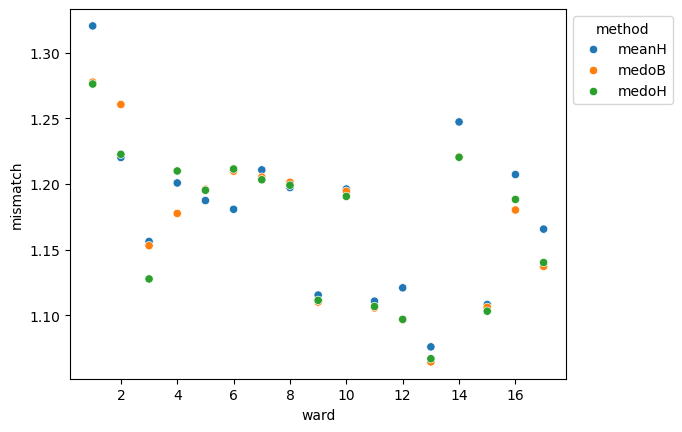

In [66]:
M = ['meanH','medoH', 'medoB']
ax = sns.scatterplot(data=results[results['method'].isin(M)], x='ward', y='mismatch', hue = 'method')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [5]:
Summarize_election(election)

This election has: 7 candidates, 11315 ballots, 1238 distinct ballots, 3.24 avg ballot length.
Top ballots:
 	 1342 votes for (1, 6). 
 	 759 votes for (6, 1). 
 	 578 votes for (3, 5). 
 	 494 votes for (4,). 
 	 403 votes for (3, 5, 7). 
 	 285 votes for (1, 6, 2). 
 	 254 votes for (1, 6, 4). 
 	 219 votes for (5, 3). 
 	 173 votes for (4, 2). 
 	 152 votes for (6, 1, 4). 
 	 144 votes for (5, 3, 7). 


In [8]:
Summarize_election(election, C)

This election has: 7 candidates, 11315 ballots, 1238 distinct ballots, 3.24 avg ballot length.
 CLUSTER 1: 5586 ballots, 487 distinct ballots, 3.11 avg ballot length. 
 CLUSTER 2: 5729 ballots, 751 distinct ballots, 3.37 avg ballot length. 
Top ballots:
 	 1342 votes for (1, 6). 
 	 759 votes for (6, 1). 
 	 578 votes for (3, 5). 
 	 494 votes for (4,). 
 	 403 votes for (3, 5, 7). 
 	 285 votes for (1, 6, 2). 
 	 254 votes for (1, 6, 4). 
 	 219 votes for (5, 3). 
 	 173 votes for (4, 2). 
 	 152 votes for (6, 1, 4). 
 	 144 votes for (5, 3, 7). 
